In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
trades = pd.read_csv("historical_data.csv")
sentiment = pd.read_csv("fear_greed_index.csv")


/tmp/ipython-input-578355694.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  trades = pd.read_csv("historical_data.csv")


In [4]:
print(trades.columns)
print(sentiment.columns)


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [7]:
trades['Timestamp IST'] = pd.to_datetime(
    trades['Timestamp IST'],
    dayfirst=True,
    errors='coerce'
)

sentiment['date'] = pd.to_datetime(
    sentiment['date'],
    errors='coerce'
)



In [8]:
print(trades['Timestamp IST'].head())
print(trades['Timestamp IST'].isna().sum())


0   2024-12-02 22:50:00
1   2024-12-02 22:50:00
2   2024-12-02 22:50:00
3   2024-12-02 22:50:00
4   2024-12-02 22:50:00
Name: Timestamp IST, dtype: datetime64[ns]
1


In [10]:
trades['date'] = trades['Timestamp IST'].dt.date
sentiment['date'] = sentiment['date'].dt.date


In [11]:
trades.isna().sum()


,0
Account,0
Coin,1
Execution Price,1
Size Tokens,1
Size USD,1
Side,1
Timestamp IST,1
Start Position,1
Direction,1
Closed PnL,1


In [12]:
trades['Closed PnL'] = trades['Closed PnL'].fillna(0)


In [14]:
merged = pd.merge(
    trades,
    sentiment[['date', 'classification']],
    on='date',
    how='left'
)


In [15]:
merged.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed


In [17]:
pnl_by_sentiment = merged.groupby('classification')['Closed PnL'].mean()
print(pnl_by_sentiment)


classification
Extreme Fear     49.930585
Extreme Greed    68.221952
Fear             69.255921
Greed            33.464971
Neutral          46.960644
Name: Closed PnL, dtype: float64


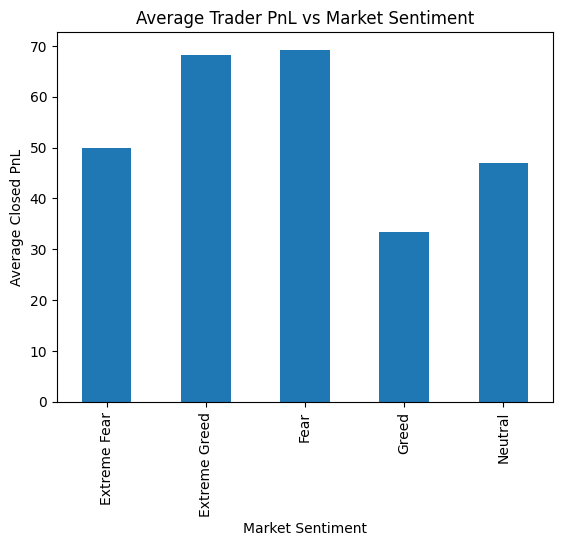

In [18]:
pnl_by_sentiment.plot(kind='bar')
plt.title("Average Trader PnL vs Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Closed PnL")
plt.show()


In [20]:
merged['Profit'] = merged['Closed PnL'] > 0

win_rate = merged.groupby('classification')['Profit'].mean()
print(win_rate)


classification
Extreme Fear     0.344746
Extreme Greed    0.449172
Fear             0.430795
Greed            0.366319
Neutral          0.413064
Name: Profit, dtype: float64


In [21]:
side_pnl = merged.groupby(['classification', 'Side'])['Closed PnL'].mean()
print(side_pnl)


classification  Side
Extreme Fear    BUY      60.111625
                SELL     37.334618
Extreme Greed   BUY      12.722075
                SELL    116.358737
Fear            BUY      86.822964
                SELL     52.125153
Greed           BUY       9.137068
                SELL     58.885425
Neutral         BUY      48.080197
                SELL     45.718601
Name: Closed PnL, dtype: float64


In [22]:
coin_pnl = merged.groupby(['classification', 'Coin'])['Closed PnL'].mean()
print(coin_pnl)


classification  Coin  
Extreme Fear    @10        -0.031742
                @107     -245.093798
                @13        -0.061895
                @142       15.529335
                @16        -0.030214
                             ...    
Neutral         kBONK       0.896872
                kFLOKI      4.083950
                kNEIRO     -2.840308
                kPEPE      -0.988079
                kSHIB       0.526700
Name: Closed PnL, Length: 689, dtype: float64


In [23]:
merged.to_csv("final_trader_sentiment_analysis.csv", index=False)


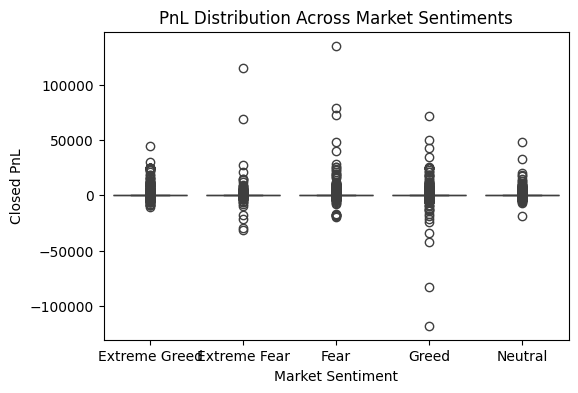

In [26]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=merged,
    x='classification',
    y='Closed PnL'
)
plt.title("PnL Distribution Across Market Sentiments")
plt.xlabel("Market Sentiment")
plt.ylabel("Closed PnL")
plt.show()


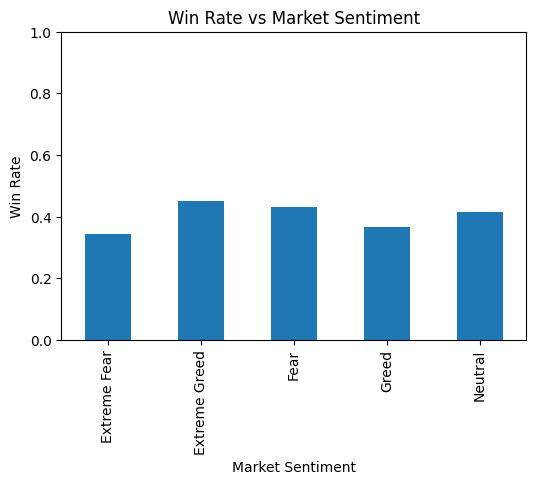

In [27]:
plt.figure(figsize=(6,4))
win_rate.plot(kind='bar')
plt.title("Win Rate vs Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Win Rate")
plt.ylim(0,1)
plt.show()


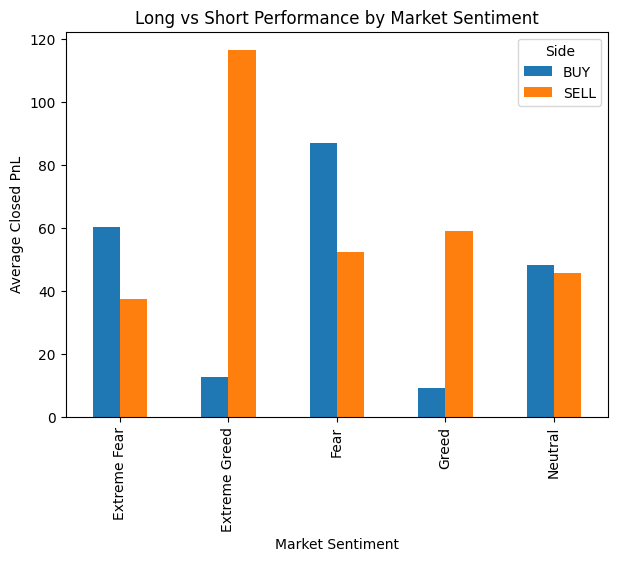

In [28]:
side_pnl = merged.groupby(['classification', 'Side'])['Closed PnL'].mean().unstack()

side_pnl.plot(kind='bar', figsize=(7,5))
plt.title("Long vs Short Performance by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Closed PnL")
plt.show()


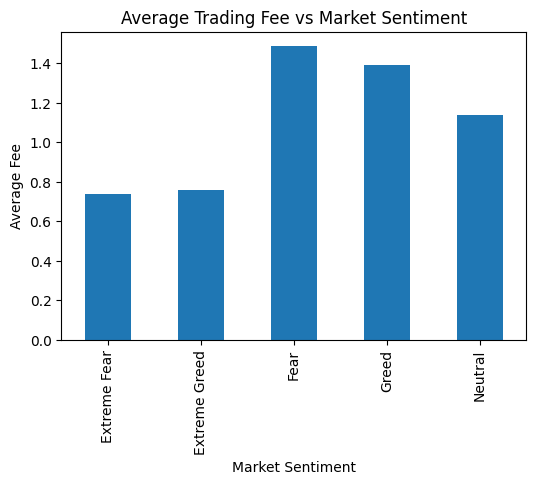

In [30]:
fee_sentiment = merged.groupby('classification')['Fee'].mean()

plt.figure(figsize=(6,4))
fee_sentiment.plot(kind='bar')
plt.title("Average Trading Fee vs Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Fee")
plt.show()


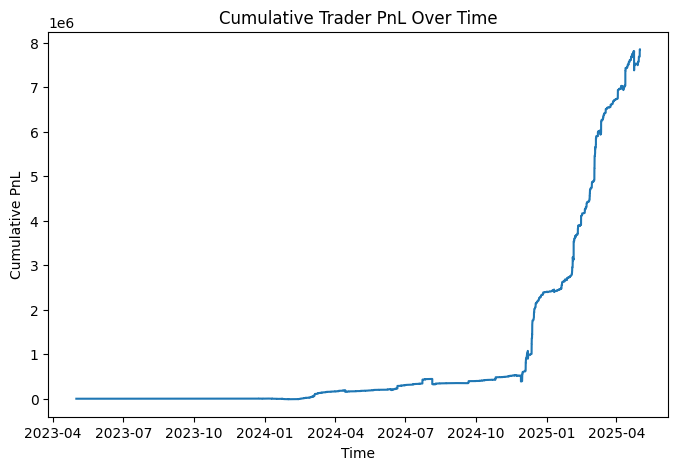

In [31]:
merged_sorted = merged.sort_values('Timestamp IST')
merged_sorted['cumulative_pnl'] = merged_sorted['Closed PnL'].cumsum()

plt.figure(figsize=(8,5))
plt.plot(merged_sorted['Timestamp IST'], merged_sorted['cumulative_pnl'])
plt.title("Cumulative Trader PnL Over Time")
plt.xlabel("Time")
plt.ylabel("Cumulative PnL")
plt.show()


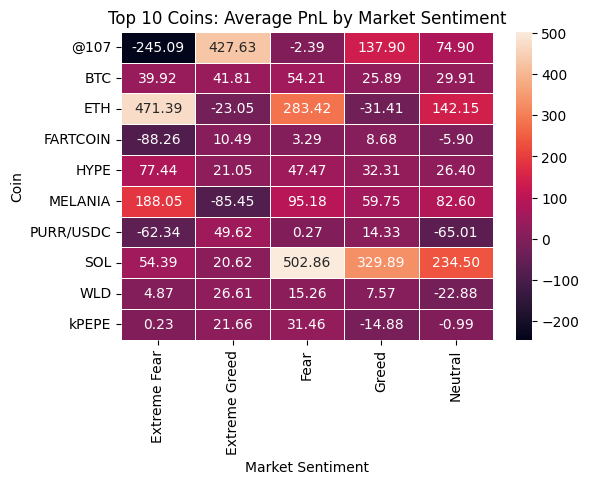

In [41]:

top_coins = merged['Coin'].value_counts().head(10).index

coin_sentiment_top = merged[merged['Coin'].isin(top_coins)].pivot_table(
    values='Closed PnL',
    index='Coin',
    columns='classification',
    aggfunc='mean'
)

plt.figure(figsize=(6,4))
sns.heatmap(
    coin_sentiment_top,
    annot=True,
    fmt=".2f",
    linewidths=0.5
)
plt.title("Top 10 Coins: Average PnL by Market Sentiment")
plt.ylabel("Coin")
plt.xlabel("Market Sentiment")
plt.show()


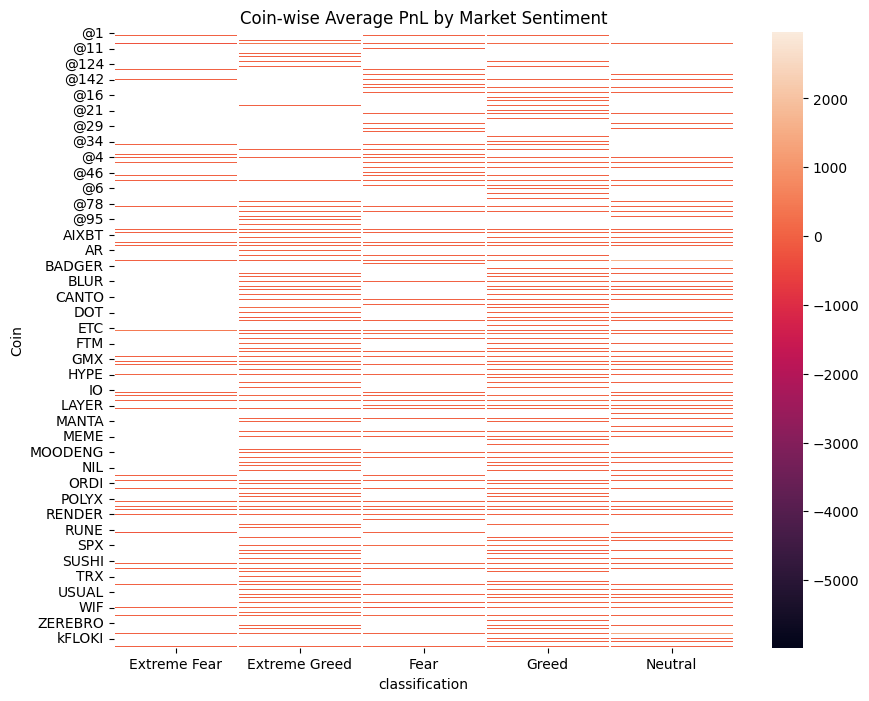

In [42]:
plt.figure(figsize=(10,8))
sns.heatmap(
    coin_sentiment,
    annot=False,
    linewidths=0.3
)

plt.title("Coin-wise Average PnL by Market Sentiment")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()
